# Perth Climate Analysis (1944-2024)
&emsp;This analysis examines the amount of rainfall (millimetres) and temperature (degree Celsius) from 1944-2024 with data collected at Perth Airport in Western Australia.

## Table of Contents
1. [Library](#library)
2. [Import Data](#import)
3. [Data Cleaning](#clean)
4. [Data Exploration](#explore)

## Library<a id='library'></a>

In [1]:
# Import libraries
# data manipulations
import pandas as pd
import numpy as np
# visualization tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('fivethirtyeight')
%matplotlib inline
# model building & evaluation
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

## Import Data<a id='import'></a>

In [2]:
df = pd.read_excel("perth_airport.xlsx")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("Data Types:")
print(df.dtypes)
df

Number of rows: 29379
Number of columns: 6
Data Types:
Year          int64
Month         int64
Day           int64
Rain        float64
Temp_Min    float64
Temp_Max    float64
dtype: object


,Year,Month,Day,Rain,Temp_Min,Temp_Max
0,1944,7,1,0.0,11.2,21.1
1,1944,7,2,26.9,10.2,16.3
2,1944,7,3,5.6,7.8,15.6
3,1944,7,4,0.0,4.9,16.8
4,1944,7,5,0.0,2.1,15.6
...,...,...,...,...,...,...
29374,2024,12,2,2.4,14.5,22.6
29375,2024,12,3,0.0,15.5,24.0
29376,2024,12,4,0.0,17.4,26.2
29377,2024,12,5,0.0,10.2,27.3


## Data Cleaning<a id='clean'></a>

In [3]:
# Check missing values
df.isna().sum()

Year         0
Month        0
Day          0
Rain         9
Temp_Min    76
Temp_Max    31
dtype: int64

In [4]:
def fill_na(i, col):
    '''
    Fill missing values by averaging the previous and the next days.
    ----
    Arguments:
    i (int): index of missing value
    col (int): column index
    ----
    Return:
    Averaged value.
    '''
    if i == 0: # first row
        while np.isnan(df.iloc[i,col]):
            i += 1
            averaged_value = df.iloc[i,col]
    elif i == df.shape[0]-1: # last row
        while np.isnan(df.iloc[i,col]):
            i -= 1
            averaged_value = df.iloc[i,col]
    else:
        prev_ind = i-1
        next_ind = i
        while np.isnan(np.average([df.iloc[prev_ind,col], df.iloc[next_ind,col]])):
            next_ind += 1
            averaged_value = np.average([df.iloc[prev_ind,col], df.iloc[next_ind,col]])
    return averaged_value

In [5]:
# Iterate each row
for i, cols in df.iterrows():
    # Iterate each value in the row
    for ind, col in enumerate(cols):
        if np.isnan(col): # If missing, fill by averaging previous and next day's values
            df.iloc[i,ind] = fill_na(i, ind)

In [6]:
df.isna().sum()

Year        0
Month       0
Day         0
Rain        0
Temp_Min    0
Temp_Max    0
dtype: int64

In [ ]:
# Export for data visualisations
df.to_excel("perth_clean.xlsx")

## Data Exploration<a id='explore'></a>

In [8]:
# Since there is no missing value in the dates, they can be converted into datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_7266/838504779.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), fontsize=8)
/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_7266/838504779.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(labels=axes[0].get_yticklabels(), fontsize=8)
/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_7266/838504779.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels=axes[0].get_xticklabels(), fontsize=8)
/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_7266/838504779.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

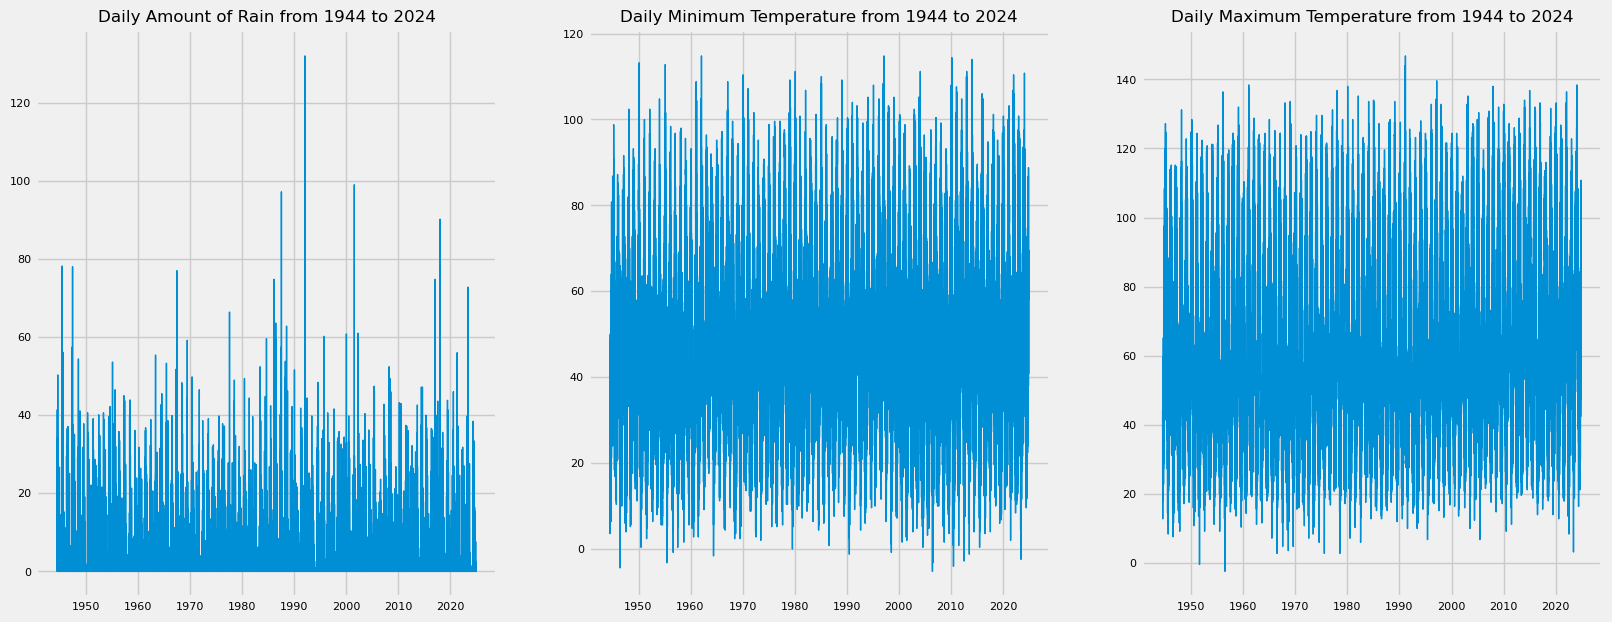

In [ ]:
# Visualise daily rain amount and temperature
fig, axes = plt.subplots(1, 3, figsize=(18,7))

axes[0].plot(df['Date'], df['Rain'], lw=1)
axes[0].set_title("Daily Amount of Rain from 1944 to 2024", fontsize=12)
axes[0].set_xticklabels(labels=axes[0].get_xticklabels(), fontsize=8)
axes[0].set_yticklabels(labels=axes[0].get_yticklabels(), fontsize=8)
axes[1].plot(df['Date'], df['Temp_Min'], lw=1)
axes[1].set_title("Daily Minimum Temperature from 1944 to 2024", fontsize=12)
axes[1].set_xticklabels(labels=axes[0].get_xticklabels(), fontsize=8)
axes[1].set_yticklabels(labels=axes[0].get_yticklabels(), fontsize=8)
axes[2].plot(df['Date'], df['Temp_Max'], lw=1)
axes[2].set_title("Daily Maximum Temperature from 1944 to 2024", fontsize=12)
axes[2].set_xticklabels(labels=axes[0].get_xticklabels(), fontsize=8)
axes[2].set_yticklabels(labels=axes[0].get_yticklabels(), fontsize=8)

plt.show()